In [1]:
import time 

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data/society/cdhit80_data_seq.csv")

In [3]:
from collections import Counter


def build_vocab(data):
    word_counts = Counter(row.lower() for sample in data for row in sample)
    vocab = [w for w, f in iter(word_counts.items())]
    return vocab

def k_mers(data, n):
    kmer_array = [[s[i:i + n].lower() for i in range(len(s) - n)] for s in data]
    vocab = build_vocab(kmer_array)
    # kmer_array = [[vocab.index(w) for w in row] for row in kmer_array]
    return kmer_array, vocab

In [4]:
kmer_array, vocab = k_mers(data['Sequence'], 1)

In [37]:
vocab = ['T', 'C', 'G', 'A']
# seq = "TTCTC"

In [43]:
# s = np.array(list("aaaaa"))
# s = np.array(kmer_array[100])

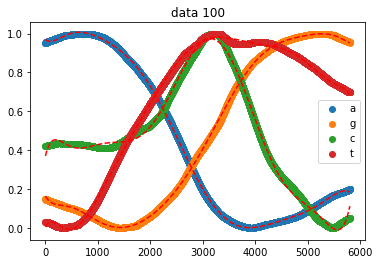

In [47]:
# V-1
idx_np = np.reshape(np.arange(len(s)), (-1, 1))
L = np.arange(len(s)) * (np.arange(len(s)) + 1) / 2
L = L + L[::-1]
for v in vocab:

    v_loc = np.argwhere(s == v).ravel()

    d = np.subtract(idx_np, v_loc)
    d = np.abs(d)
    # print(d)
    # print(d.shape)
    d = np.sum(d, axis=1)
    d = d / L

    
    # nor
    d = (d - d.min()) / (d.max() - d.min())

    plt.scatter(np.arange(len(d)), d, label=v)
    # plt.scatter(v_loc, np.zeros(len(v_loc)), alpha=1e-2)
    t = np.arange(0, len(d), 0.01)
    z = np.polyfit(np.arange(len(d)), d, 10)
    p = np.poly1d(z)

    plt.plot(t, p(t), 'r--')
    # sns.rugplot(v_loc)
    # plt.boxplot(v_loc)
# plt.ylim(0, 1)
plt.title("data 100")
plt.legend()
plt.show()


5814


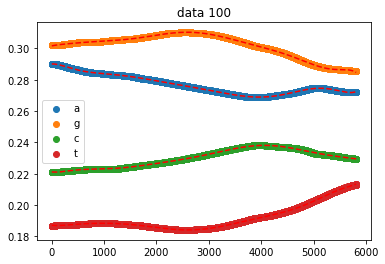

In [42]:
# V-2
# s = np.array(list("aatat"))
s = np.array(kmer_array[np.random.randint(len(kmer_array))])
print(len(s))
w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
w = np.abs(w) - w.max()
w = np.power(w - 1, 2)
L = np.sum(w, axis=0)

for v in vocab:
    d = np.where(s == v, w, 0)
    d = np.sum(d, axis=1)
    d = d / L
    # nor
    # if d.max() - d.min():
    #     d = (d - d.min()) / (d.max() - d.min())
    z = np.polyfit(np.arange(len(d)), d, 10)
    p = np.poly1d(z)

    plt.scatter(np.arange(len(d)), d, label=v)
    t = np.arange(0, len(d), 0.01)
    plt.plot(t, p(t), 'r--')
plt.title("data 100")
plt.legend()
plt.show()


In [5]:
def features_linear_encoder(data, vocab):
    features_data = []
    for s in data:
        s = np.array(s)
        t = time.time()
        w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
        w_abs = np.abs(w)
        w_max = (w.max() + 1)
        w = w_abs - w_max
        w = np.power(w , 2)
        L = np.sum(w, axis=0)
        
        linear_data = np.array([])
        for v in vocab:
            d = np.where(s == v, w, 0)
            d = np.sum(d, axis=1)
            d = d / L
            z = np.polyfit(np.arange(len(d)), d, 10)
            linear_data = np.append(linear_data, z)
        features_data.append(linear_data.tolist())
        print("s:", len(s)," t:", time.time() - t)
    return features_data
features_data = features_linear_encoder(kmer_array, vocab=vocab)

s: 91670  t: 421.64490389823914
s: 37026  t: 55.748226165771484
s: 25331  t: 21.09130072593689
s: 24921  t: 21.271382570266724
s: 22742  t: 17.659114360809326
s: 19295  t: 12.620986223220825
s: 19262  t: 12.555208921432495
s: 18035  t: 11.011701107025146
s: 16049  t: 7.932656288146973
s: 13369  t: 5.983008146286011
s: 12721  t: 5.415071964263916
s: 11867  t: 4.696632623672485
s: 11531  t: 4.085695266723633
s: 11209  t: 4.247539520263672
s: 10509  t: 3.67179799079895
s: 10193  t: 3.4955379962921143
s: 10008  t: 3.337770700454712
s: 9847  t: 3.451993942260742
s: 9700  t: 3.1037769317626953
s: 9642  t: 3.080232858657837
s: 9565  t: 3.1505932807922363
s: 9418  t: 3.0129051208496094
s: 9160  t: 2.7531254291534424
s: 9026  t: 2.720825433731079
s: 8778  t: 2.534130334854126
s: 8740  t: 2.4814233779907227
s: 8726  t: 2.4696710109710693
s: 8725  t: 2.513532876968384
s: 8712  t: 2.485205888748169
s: 8605  t: 2.4948205947875977
s: 8497  t: 2.467794895172119
s: 8476  t: 2.3455028533935547
s: 8416 

In [8]:
features_output = pd.DataFrame(features_data)
features_output["len"] = [len(s) for s in data["Sequence"]]
features_output["Cytosolic"] = data["Cytosolic"]
features_output["Nucleus"] = data["Nucleus"]
features_output.to_csv("data/features_output_data.csv", index=False)

In [ ]:
for s in data:
    print(len(s))
    t = time.time()
    w = np.reshape(np.arange(len(s)), (-1, 1)) - np.arange(len(s))
    print("w:", time.time() - t)

    t = time.time()
    w_abs = np.abs(w)
    print("w_abs:", time.time() - t)

    t = time.time()
    w_max = (w.max() + 1)
    print("w_max:", time.time() - t)

    t = time.time()
    w = w_abs - w_max
    print("w_abs - w_max:", time.time() - t)

    t = time.time()
    w = np.power(w , 2)
    print("w:", time.time() - t)

    t = time.time()
    L = np.sum(w, axis=0)
    print("w_sum:", time.time() - t)
    break